In [292]:
import pandas as pd
import seaborn as sns
df=pd.read_csv('incident_event_log.csv')
print('Shape of the data',df.shape)
df.head(5)

Shape of the data (119998, 36)


,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [615]:
# Number of unique ticktes 
print('Number of unique tickets: ', len(df1.number.unique()))

Number of unique tickets:  20769


Active                33582
New                   30229
Resolved              21500
Closed                20825
Awaiting User Info    12884
Awaiting Vendor         557
Awaiting Problem        400
Awaiting Evidence        19
-100                      2
Name: incident_state, dtype: int64


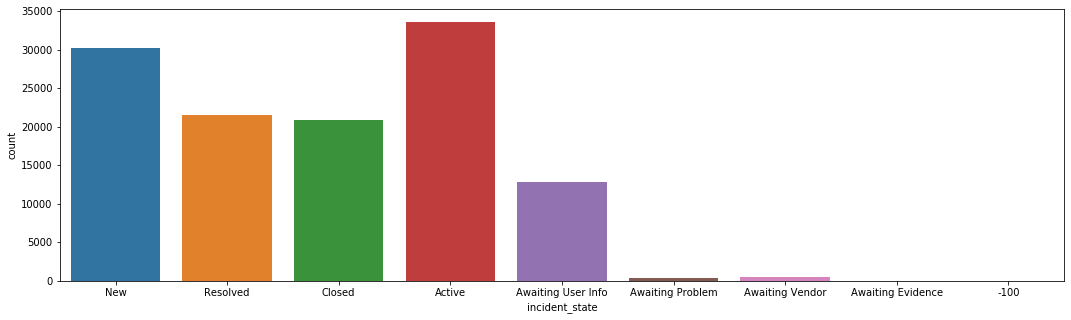

In [74]:
f, ax = plt.subplots(figsize=(18,5))
values=df1.incident_state.value_counts()
print(values)
sns.countplot(df1.incident_state)

1. Most of the logs are having active state.
2. Awaiting vendor, Awaiting problem, Awaiting Evidence combiningly come around less than 1 percent, which is very less
3. -100 may be the unkonown category, we can group less occured categories into a single category as others

In [75]:
# active feature tells weather the ticket is closed or not, we need to predict for the log which is not in closed 
# which implies the value of active feature is always true for test data points, which doesnot 
# provide any information for predicting, so removing the feature

df1.drop(['active'],axis=1,inplace=True)

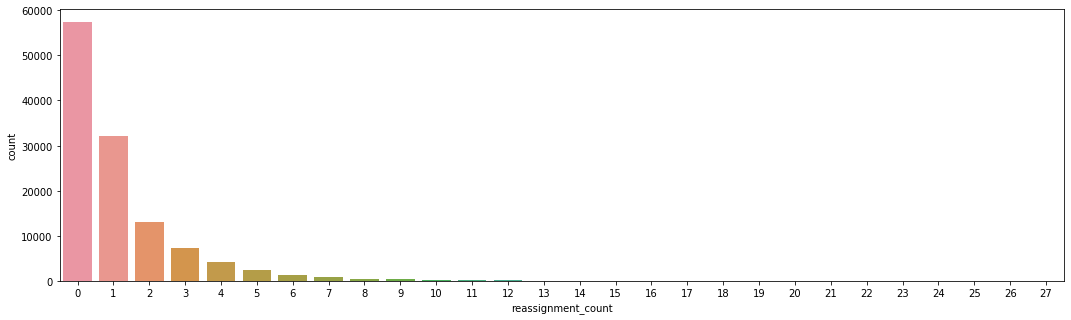

In [78]:
f, ax = plt.subplots(figsize=(18,5))
sns.countplot(df1.reassignment_count)

1. More than half of the logs are having 0,1 as their reassignment counts
2. We can barely see the numbers which are having high reassignment counts

0    20535
1      211
2       15
4        3
3        3
8        1
6        1
Name: reopen_count, dtype: int64


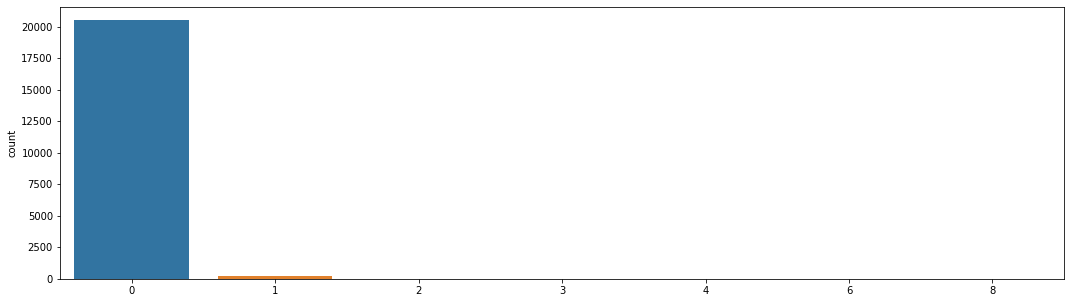

In [99]:
f, ax = plt.subplots(figsize=(18,5))
# Reopen count increases for a ticket as client rejects the issue, we can have multiple values for same ticket
# So gouping the ticket and reopen_count and taking only the max value in that
mx=df1.groupby(['number'])['reopen_count'].max()
values=mx.value_counts()
print(values)
sns.countplot(mx.values)

1. Almost 98-99 percent of the tickets are having reopen_count as 0
2. The larger values may provide good information, we need to check if closing time increases as the reopen count increases,
we can do this in the later part

2      4231
3      2973
4      1998
1      1658
5      1566
       ... 
117       1
101       1
85        1
116       1
0         1
Name: sys_mod_count, Length: 104, dtype: int64


<BarContainer object of 104 artists>

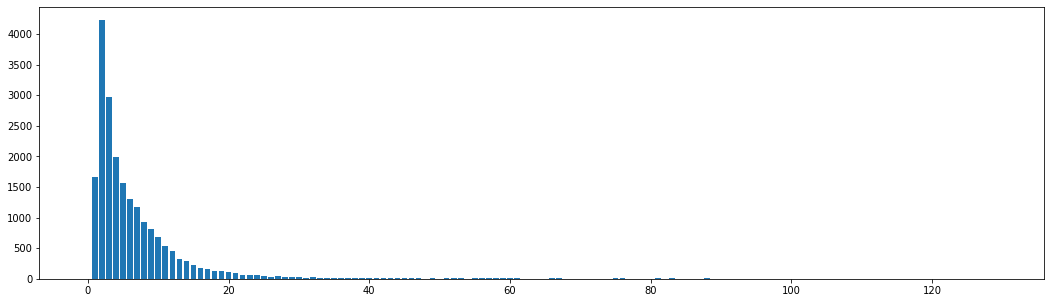

In [101]:
f, ax = plt.subplots(figsize=(18,5))
# sys_mod count indicates the number of incidents has been recorded before closing the ticket
# we will see sys_mod for each ticket [Final Number of updates before closing the ticket]
mx=df1.groupby(['number'])['sys_mod_count'].max()
values=mx.value_counts()
print(values)
plt.bar(values.index,values.values)
#sns.countplot(mx.values)

1. Most of the tickets were closed within 20 updates (sys_mod_count)
2. More than 4000 tickets are closed with sys_mod_count=2

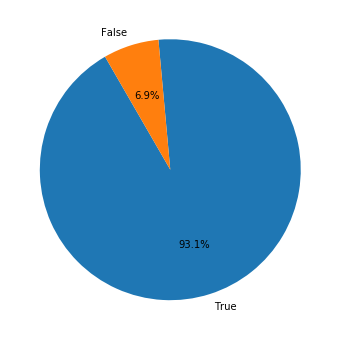

In [128]:
s1=df1.made_sla.value_counts()
labels = s1.index
sizes = s1.values
fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=120)
plt.show()

1. Only 6.9 % logs are having sla as false

In [214]:
# Getting caller id for each ticket
# .size returns a series, using reset index to convert to 
s1=df1.groupby(['number','caller_id']).size().reset_index()

# Getting number of tickets by a particular caller id
values=s1['caller_id'].value_counts()
print(values)

Caller 1904    437
Caller 290     239
Caller 4514    128
Caller 4414     52
Caller 3763     49
              ... 
Caller 4037      1
Caller 3872      1
Caller 2093      1
Caller 4799      1
Caller 2694      1
Name: caller_id, Length: 4829, dtype: int64


1. There are about 4829 unique caller ids
2. Caller 1904 has registered about 437 unique tickets
3. Only 4 caller id's are having more than 50 tickets filed under their name

Opened by  17     5686
Opened by  24     1345
Opened by  131     930
Opened by  108     872
Opened by  40      822
                  ... 
Opened by  90        1
Opened by  233       1
Opened by  75        1
Opened by  344       1
Opened by  280       1
Name: opened_by, Length: 157, dtype: int64


<BarContainer object of 157 artists>

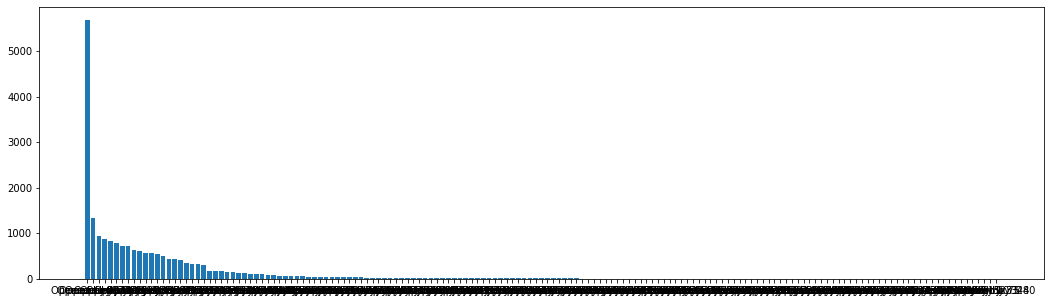

In [207]:
# Getting opened_by id for each ticket
# .size returns a series, using reset index to convert to 
s1=df1.groupby(['number','opened_by']).size().reset_index()

# Getting number of tickets opened by a particular id
values=s1.opened_by.value_counts()
print(values)
f, ax = plt.subplots(figsize=(18,5))
plt.bar(values.index,values.values)

1. There 157 unique people who opened tickets along with missing feature
2. Maximum tickets - 5686 are opened by id 17

Missing           9079
Created by 10     2769
Created by 13      602
Created by 81      557
Created by 20      490
                  ... 
Created by 178       1
Created by 56        1
Created by 2         1
Created by 68        1
Created by 60        1
Name: sys_created_by, Length: 150, dtype: int64


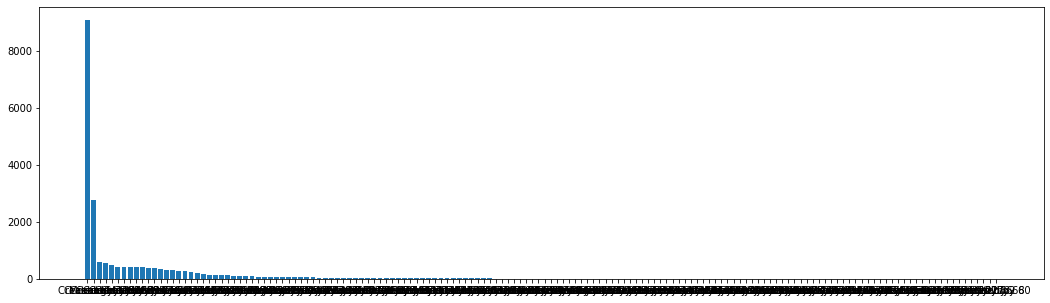

In [209]:
s=df1.groupby(['number','sys_created_by']).size().reset_index()
s1=s['sys_created_by'].value_counts()
f, ax = plt.subplots(figsize=(18,5))
plt.bar(s1.index,s1.values)
print(s1)

1. There are 149 unique ids who registered the incident
2. Almost 9k tickets are not having id's of the person who registered the ticket, it is featured as a seperate category- missing

Updated by 908    29625
Updated by 44     10468
Updated by 60      6544
Updated by 429     2801
Updated by 135     2120
                  ...  
Updated by 289        1
Updated by 228        1
Updated by 440        1
Updated by 439        1
Updated by 87         1
Name: sys_updated_by, Length: 714, dtype: int64


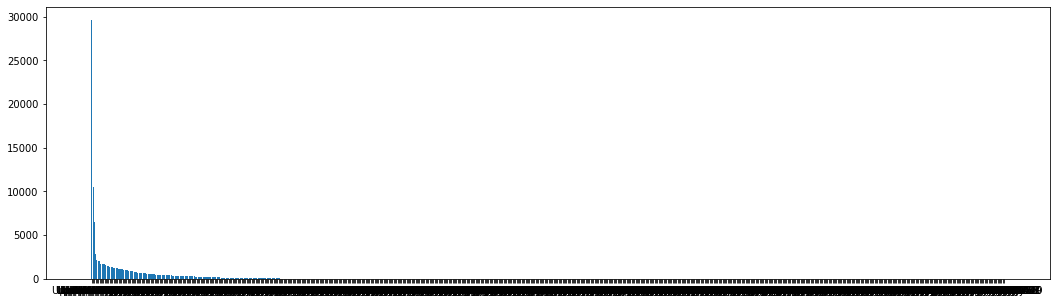

In [225]:
# Unlike sys_created_by ; sys_updated_by is done for each log instead of each ticket
s1=df1['sys_updated_by'].value_counts()
f, ax = plt.subplots(figsize=(18,5))
plt.bar(s1.index,s1.values)
print(s1)

1. There are 714 unique id's or people who updated the logs
2. Around 30k logs are udpated by id 908, contributing around 25 % of the total data points

Phone    20733
Email       36
Name: contact_type, dtype: int64


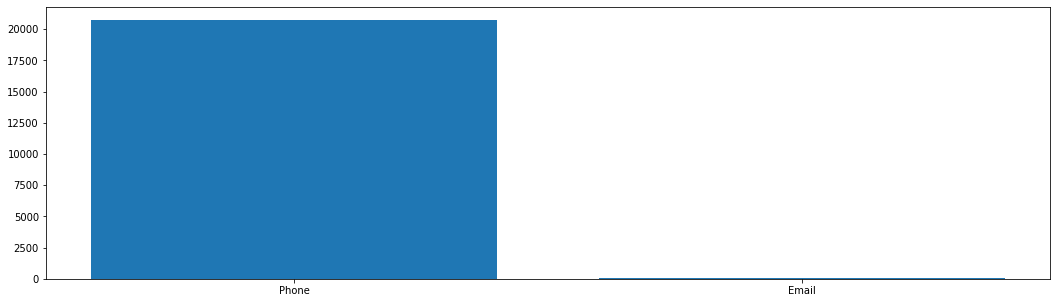

In [231]:
s=df1.groupby(['number','contact_type']).size().reset_index()
s1=s['contact_type'].value_counts()
f, ax = plt.subplots(figsize=(18,5))
plt.bar(s1.index,s1.values)
print(s1)

Only 36 tickets are contacted through e-mail, rest all of them are done via phone.

Location 204    4697
Location 161    3201
Location 143    2728
Location 108    1761
Location 93     1661
                ... 
Location 72        1
Location 141       1
Location 137       1
Location 68        1
Location 243       1
Name: location, Length: 203, dtype: int64


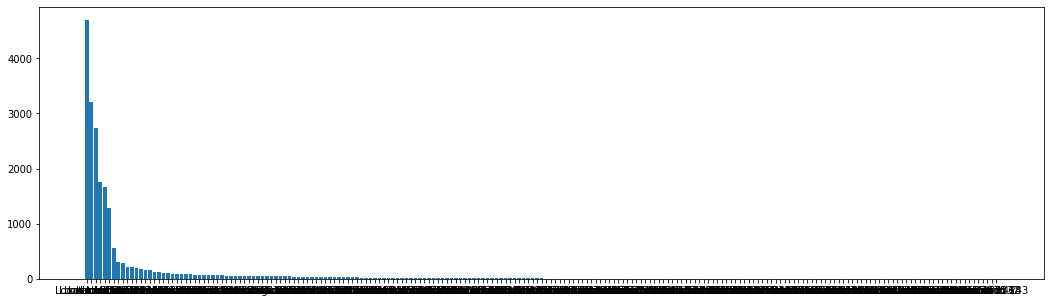

In [232]:
s=df1.groupby(['number','location']).size().reset_index()
s1=s['location'].value_counts()
f, ax = plt.subplots(figsize=(18,5))
plt.bar(s1.index,s1.values)
print(s1)

1. There are 202 unique locations, missing is another location added for null values
2. Location 204 is affected with around 4.5k tickets, which is maximum a location getting affected

Category 42    2992
Category 26    2853
Category 53    2442
Category 46    2067
Category 32    1327
Category 9      955
Category 37     951
Category 23     932
Category 20     918
Category 57     756
Category 61     721
Category 40     656
Category 45     597
Category 24     554
Category 51     536
Category 28     512
Category 35     459
Category 34     446
Category 44     315
Category 19     209
Category 43     151
Category 13     121
Category 55     113
Category 17      76
Category 22      53
Category 8       49
Category 38      36
Category 41      36
Category 7       29
Missing          26
Category 63      12
Category 47       7
Category 56       6
Category 30       5
Category 62       5
Category 31       5
Category 54       4
Category 4        2
Category 29       2
Category 25       2
Category 27       1
Category 3        1
Category 15       1
Category 36       1
Category 49       1
Name: category, dtype: int64


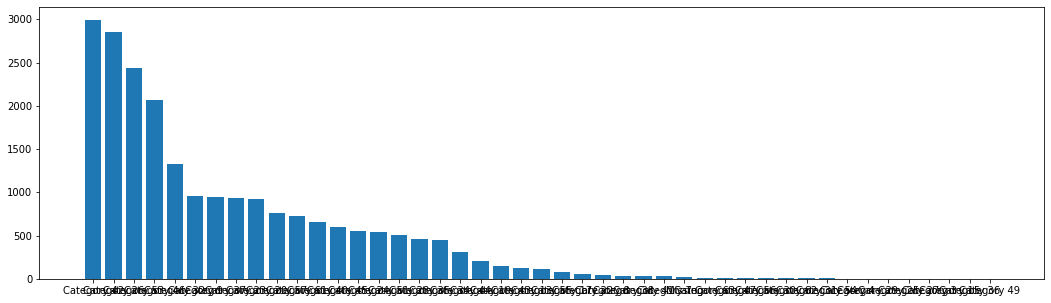

In [236]:
s=df1.groupby(['number','category']).size().reset_index()
s1=s['category'].value_counts()
f, ax = plt.subplots(figsize=(18,5))
plt.bar(s1.index,s1.values)
print(s1)

1. There are 44 unique categories and a missing category for null values
2. Maximum of 656 tickets are present under a category, for 75 percentile of tickets

Subcategory 174    5958
Subcategory 223    3071
Subcategory 175    1653
Subcategory 164    1047
Subcategory 9       762
                   ... 
Subcategory 187       1
Subcategory 298       1
Subcategory 149       1
Subcategory 160       1
Subcategory 32        1
Name: subcategory, Length: 221, dtype: int64


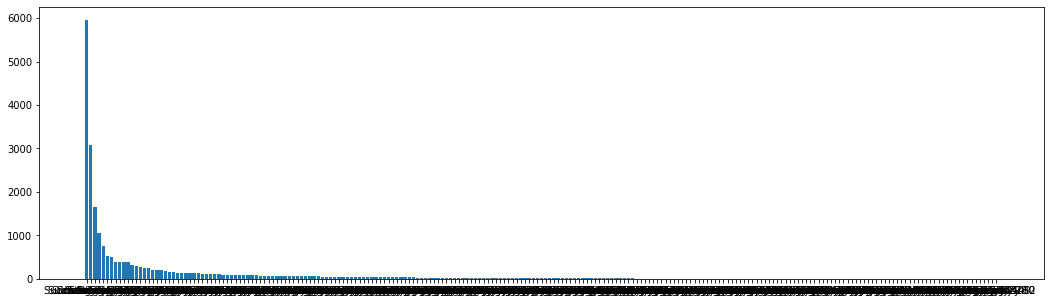

In [241]:
s=df1.groupby(['number','subcategory']).size().reset_index()
s1=s['subcategory'].value_counts()
f, ax = plt.subplots(figsize=(18,5))
plt.bar(s1.index,s1.values)
print(s1)

1. There are 221 unique subcategories along with missing feature
2. Around 6k tickets are under subcategory 174

Symptom 491    8279
Missing        5188
Symptom 534    1303
Symptom 116     436
Symptom 387     390
               ... 
Symptom 189       1
Symptom 555       1
Symptom 545       1
Symptom 547       1
Symptom 77        1
Name: u_symptom, Length: 500, dtype: int64


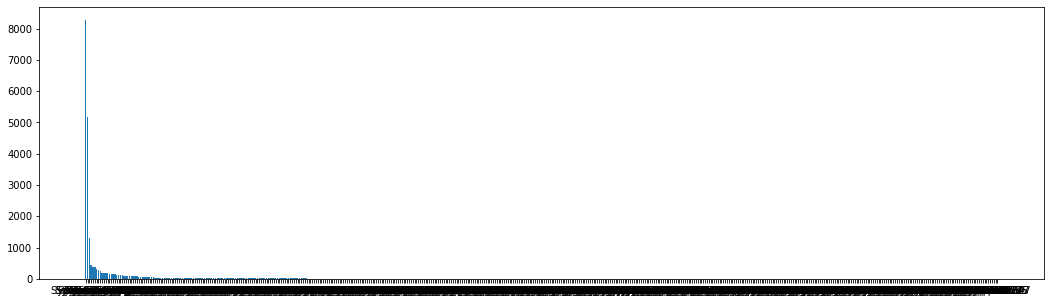

In [243]:
s=df1.groupby(['number','u_symptom']).size().reset_index()
s1=s['u_symptom'].value_counts()
f, ax = plt.subplots(figsize=(18,5))
plt.bar(s1.index,s1.values)
print(s1)

1. There ae 500 unique descriptions which describe about service availabilty
2. Around 5.2k tickets are missing this description

2 - Medium    113691
3 - Low         3418
1 - High        2889
Name: impact, dtype: int64


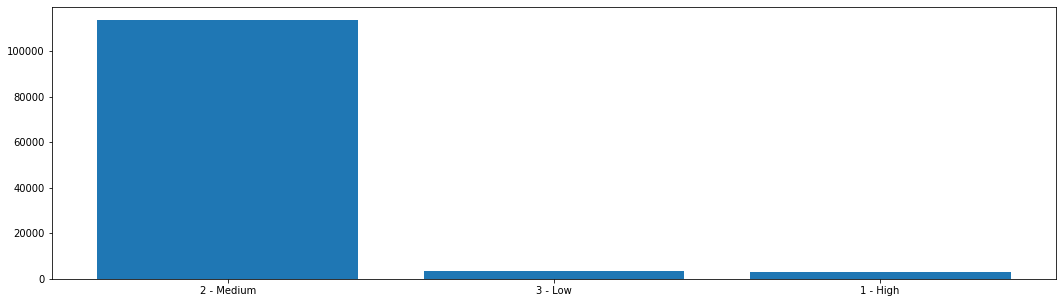

In [244]:
# Tickets will get ecsaleted to other impact value if there are delays or any urgencies
# So we need take impact per log instaed of ticket
s1=df1['impact']value_counts()
f, ax = plt.subplots(figsize=(18,5))
plt.bar(s1.index,s1.values)
print(s1)

Almost 90% logs are in Medium status

2 - Medium    113550
1 - High        3303
3 - Low         3145
Name: urgency, dtype: int64


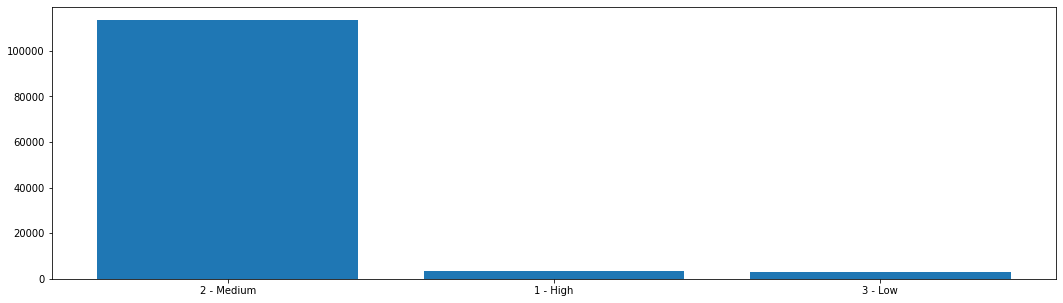

In [246]:
# similar to the impact, for urgency also we calculate based on logs
s1=df1['urgency'].value_counts()
f, ax = plt.subplots(figsize=(18,5))
plt.bar(s1.index,s1.values)
print(s1)

90 % of logs are having medium urgency

3 - Moderate    112115
4 - Low           3549
2 - High          2499
1 - Critical      1835
Name: priority, dtype: int64


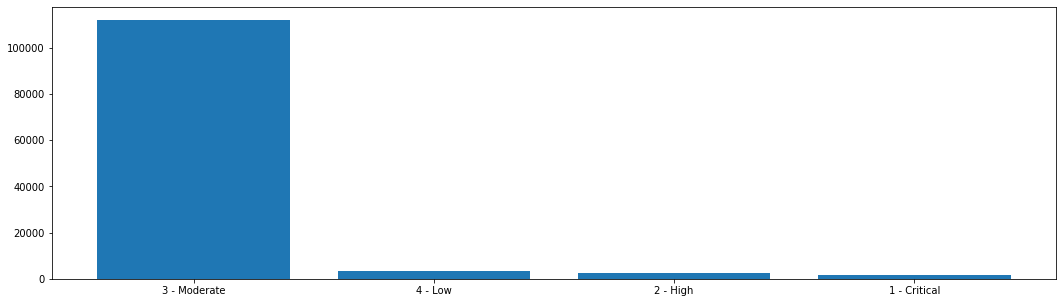

In [247]:
s1=df1['priority'].value_counts()
f, ax = plt.subplots(figsize=(18,5))
plt.bar(s1.index,s1.values)
print(s1)

90 % of logs are having moderate priority

Group 70    35023
Missing     14213
Group 25     6765
Group 24     5823
Group 20     5146
            ...  
Group 79        9
Group 80        6
Group 71        6
Group 4         1
Group 11        1
Name: assignment_group, Length: 73, dtype: int64


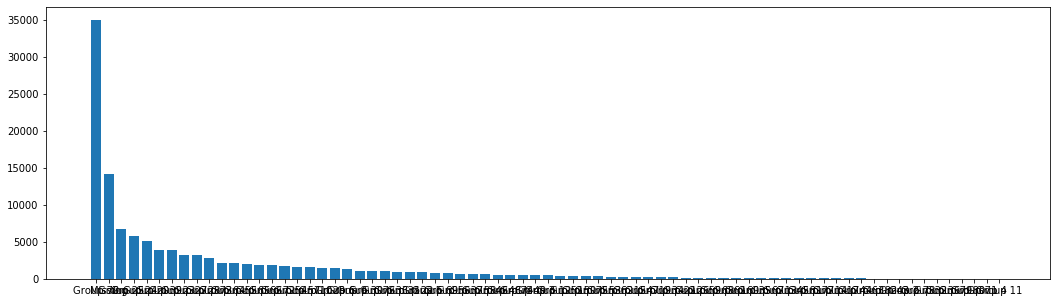

In [249]:
# Each incident is assigned to a group, so we consider groups per incident
s1=df1['assignment_group'].value_counts()
f, ax = plt.subplots(figsize=(18,5))
plt.bar(s1.index,s1.values)
print(s1)

1. There are 73 unique groups where tickets get assigned
2. Around 14k tickets are missing the assigned group
3. Group 70 is assigned with more than 35k logs

Missing         23030
Resolver 17     10056
Resolver 13      7222
Resolver 194     2955
Resolver 57      2907
                ...  
Resolver 67         1
Resolver 146        1
Resolver 131        1
Resolver 129        1
Resolver 199        1
Name: assigned_to, Length: 209, dtype: int64


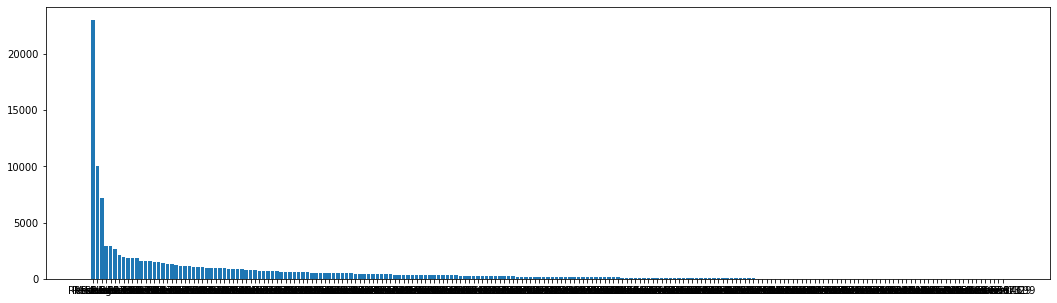

In [250]:
# Each incident is assigned to a user, so we consider user per incident
s1=df1['assigned_to'].value_counts()
f, ax = plt.subplots(figsize=(18,5))
plt.bar(s1.index,s1.values)
print(s1)

1. There are 209 unique people which logs are being assigned
2. Reolver 17 has resolved more than 10k logs
3. Around 23k logs are missing the assigned user

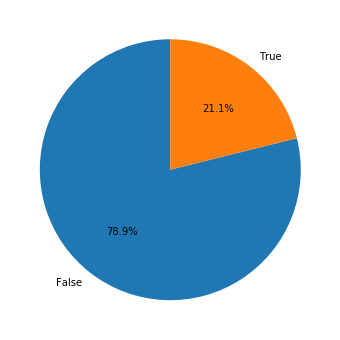

False    94664
True     25334
Name: knowledge, dtype: int64


In [268]:
# knowledge feature is true when a log is resolved with some document
s1=df1.knowledge.value_counts()
labels = s1.index
sizes = s1.values
fig1, ax1 = plt.subplots(figsize=(18,6))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()
print(s1)

Only 21 perecnt of logs are resolved with a knowledge based document

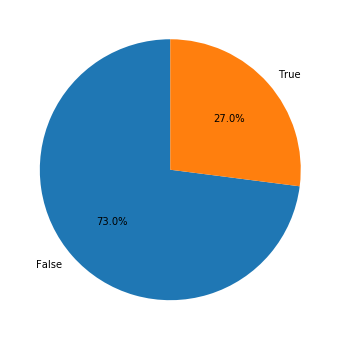

False    87564
True     32434
Name: u_priority_confirmation, dtype: int64


In [282]:
s1=df1.u_priority_confirmation.value_counts()
labels = s1.index
sizes = s1.values
fig1, ax1 = plt.subplots(figsize=(18,6))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()
print(s1)

27 percent of logs priority field has been double-checked

Do Not Notify    119879
Send Email          119
Name: notify, dtype: int64


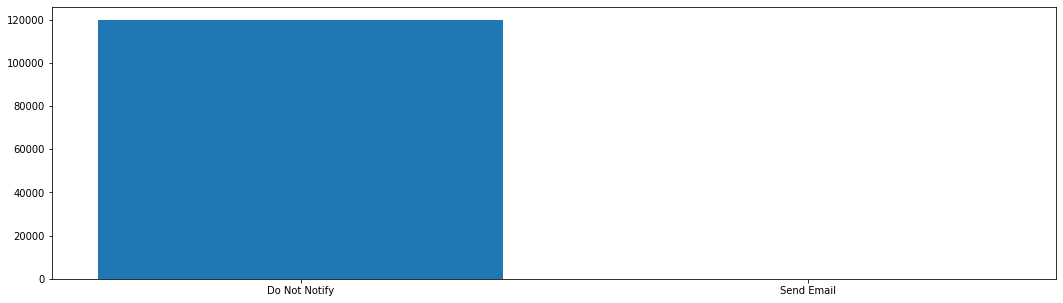

In [271]:
s1=df1['notify'].value_counts()
f, ax = plt.subplots(figsize=(18,5))
plt.bar(s1.index,s1.values)
print(s1)

Only 119 logs are notified with emails, wee need to check whether this notification helps to close the ticket

code 6     74039
code 7     18066
code 9     10187
code 8      4480
code 5      3863
code 1      3044
code 10     1455
code 11     1411
code 4       911
code 16      905
code 3       534
Missing      525
code 2       288
code 15      147
code 17       99
code 13       41
code 14        3
Name: closed_code, dtype: int64


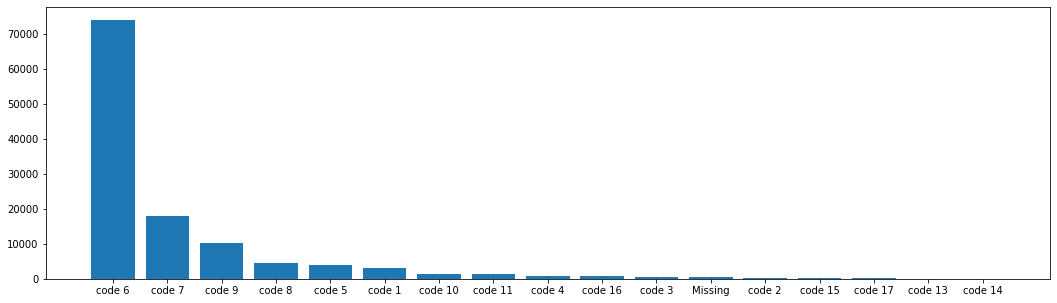

In [277]:
s1=df1['closed_code'].value_counts()
f, ax = plt.subplots(figsize=(18,5))
plt.bar(s1.index,s1.values)
print(s1)

1. There are 17 unique codes to resolve the log
2. 74k logs are closed with code 6

Resolved by 15     14398
Resolved by 11      9864
Resolved by 53      3381
Resolved by 177     3226
Resolved by 62      3186
                   ...  
Resolved by 74         5
Resolved by 228        4
Resolved by 186        3
Resolved by 48         3
Resolved by 97         3
Name: resolved_by, Length: 191, dtype: int64


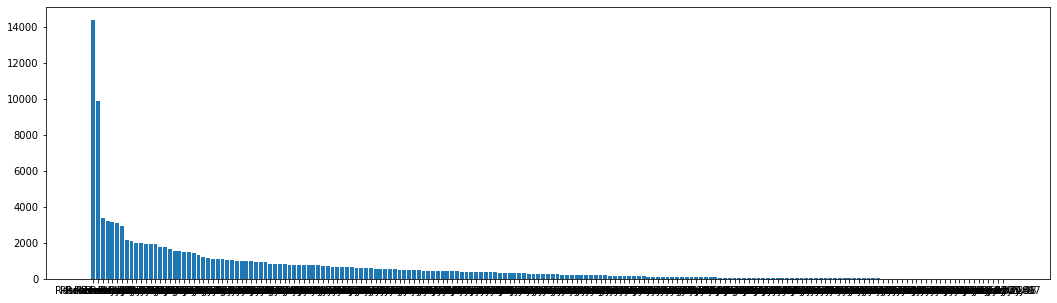

In [281]:
s1=df1['resolved_by'].value_counts()
f, ax = plt.subplots(figsize=(18,5))
plt.bar(s1.index,s1.values)
print(s1)

1. There are 191 unique identifiers to resolve a log
2. Id 15 resolved the maximum logs with resolving around 14k

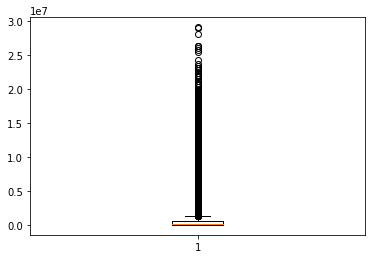

Median time to resolve a ticket       :  107880.0
75 percentile time to resolve a ticket:  528480.0
90 percentile time to resolve a ticket:  1319916.0
99 percentile time to resolve a ticket:  10187239.2
100 percentile time to resolve a ticket:  29052600.0


In [334]:
s=df1.groupby(['number'])['resolved_time'].mean()
plt.boxplot(s.values)
plt.show()
print('Median time to resolve a ticket       : ',np.percentile(s.values,50))
print('75 percentile time to resolve a ticket: ',np.percentile(s.values,75))
print('90 percentile time to resolve a ticket: ',np.percentile(s.values,90))
print('99 percentile time to resolve a ticket: ',np.percentile(s.values,99))
print('100 percentile time to resolve a ticket: ',np.percentile(s.values,100))

1. 50 percent of tickets are resolved within 107880 seconds, close to 1 day 6 hours
2. 90 percent of tickets are resolved within 1319916 seconds, close to 15 days 6 hours

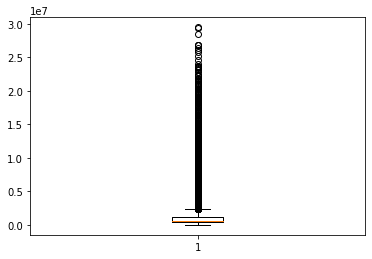

Median time to close a ticket       :  554100.0
75 percentile time to close a ticket:  1236960.0
90 percentile time to close a ticket:  1980384.0000000005
99 percentile time to close a ticket:  10705775.999999996
100 percentile time to close a ticket:  29486220.0


In [335]:
s=df1.groupby(['number'])['closed_time'].mean()
plt.boxplot(s.values)
plt.show()
print('Median time to close a ticket       : ',np.percentile(s.values,50))
print('75 percentile time to close a ticket: ',np.percentile(s.values,75))
print('90 percentile time to close a ticket: ',np.percentile(s.values,90))
print('99 percentile time to close a ticket: ',np.percentile(s.values,99))
print('100 percentile time to close a ticket: ',np.percentile(s.values,100))

1. 50 percentile tickets are closed within 554100 seconds, close to 6 days
2. 90 percentile tickets are closed within 1980384 seconds, close to 23 days

## Feature analysis with target variables

In [433]:
def plot_target(feature):
    ''' Plots subcategories vs target variables mean'''
    cats=df1[feature].unique()
    res=[]
    cls=[]
    for val in cats:
        res.append(df1.resolved_time[df1[feature]==val].mean())
        cls.append(df1.closed_time[df1[feature]==val].mean())
    
    plt.subplots(1,1,figsize=(17,5))
    plt.title(feature+' vs resolved time')
    plt.bar(cats,res)
    plt.show()
    
    plt.subplots(1,1,figsize=(17,5))
    plt.title(feature+' vs closed time')
    plt.bar(cats,cls)
    plt.show()

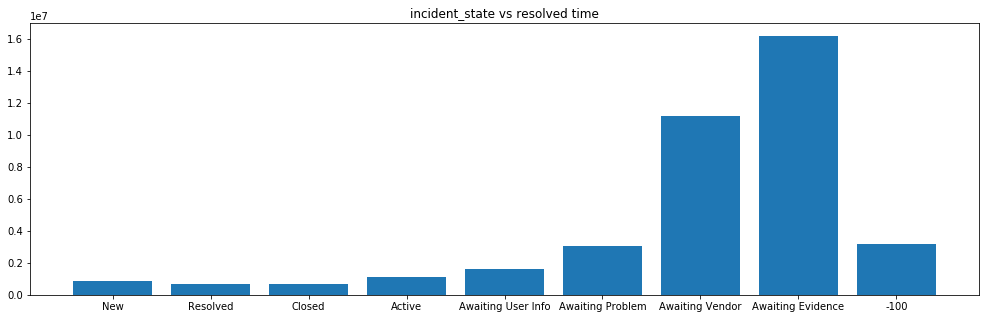

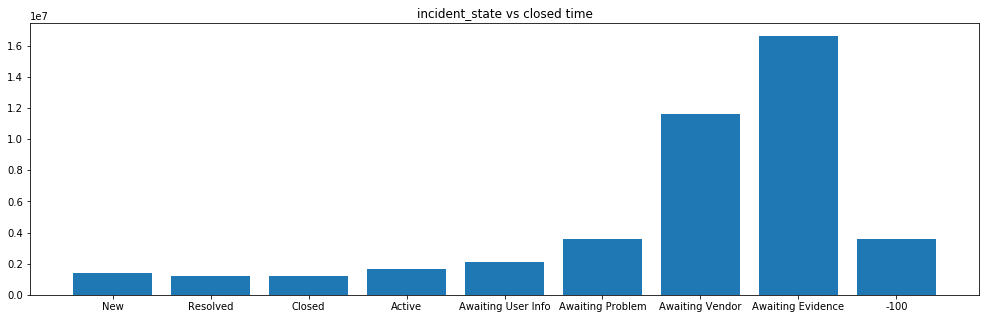

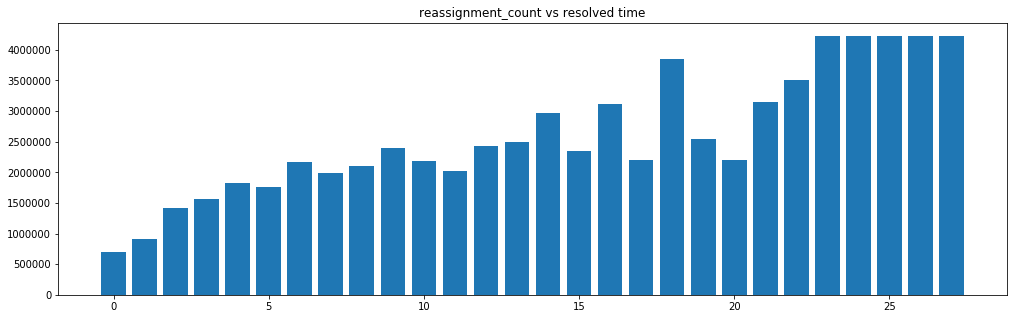

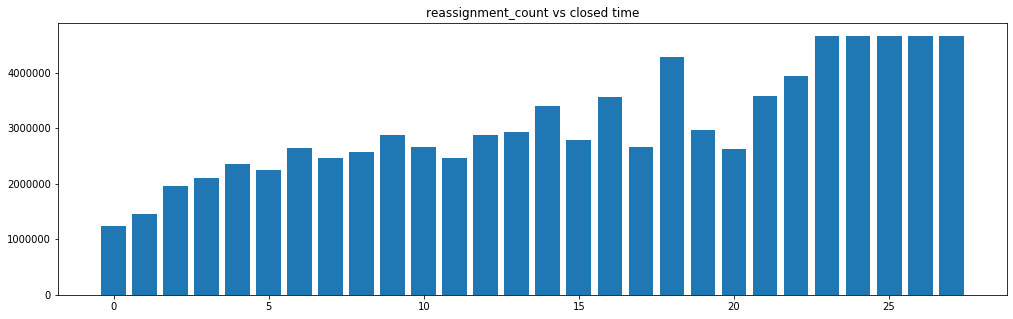

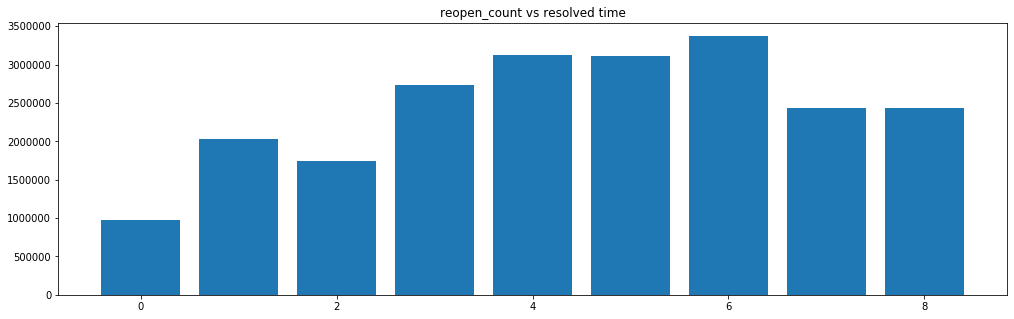

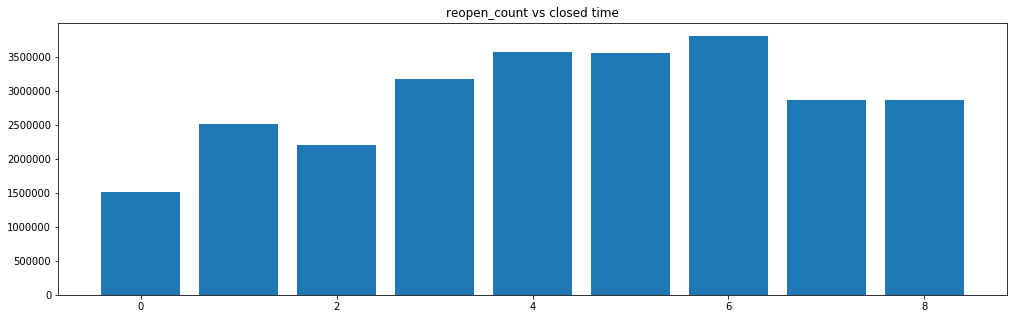

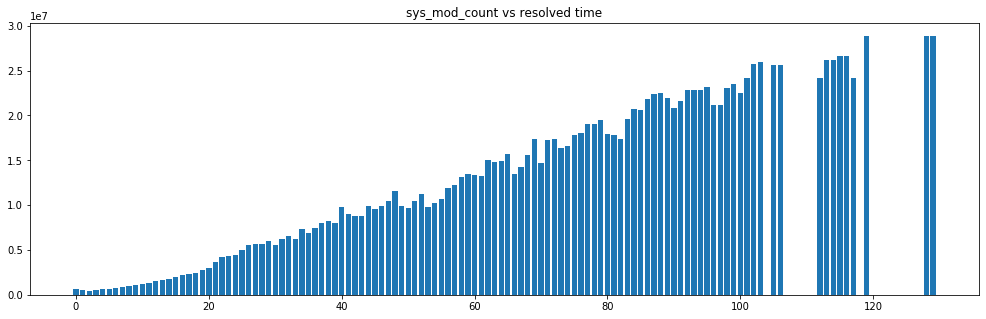

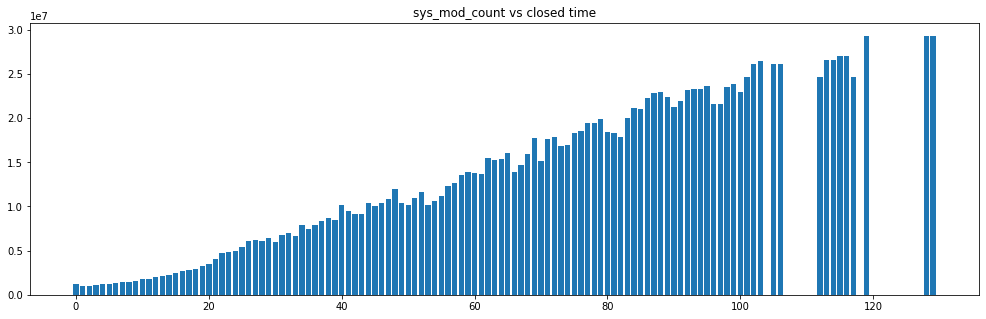

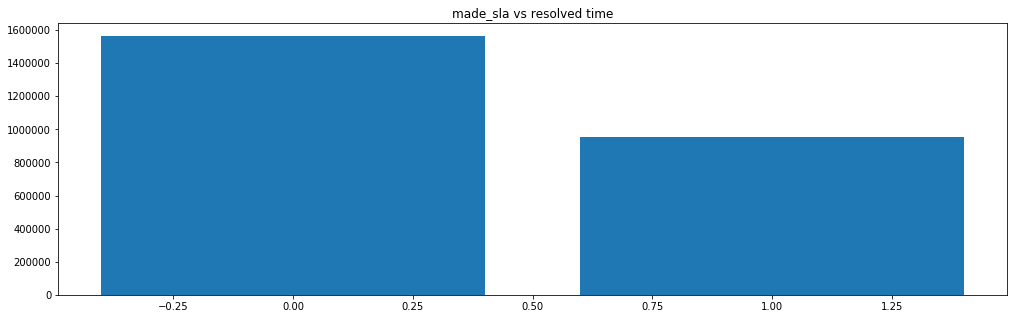

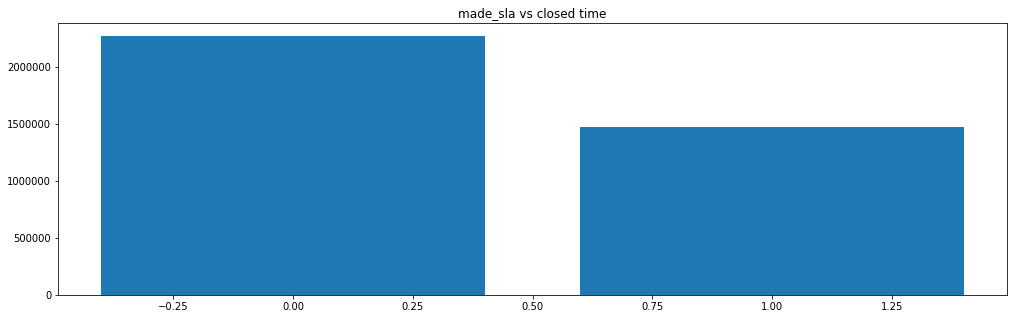

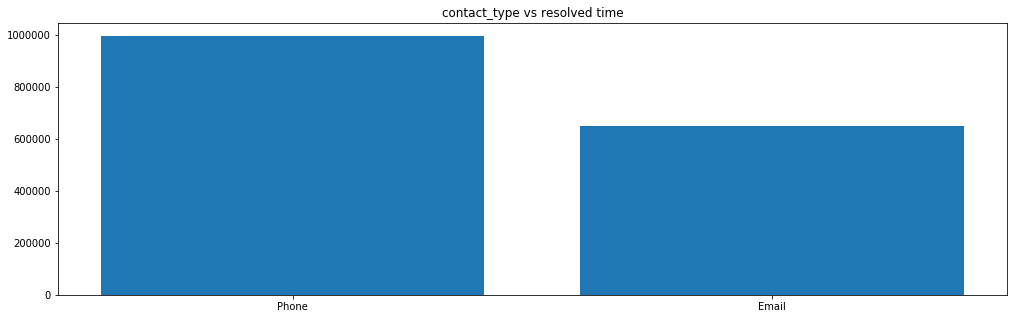

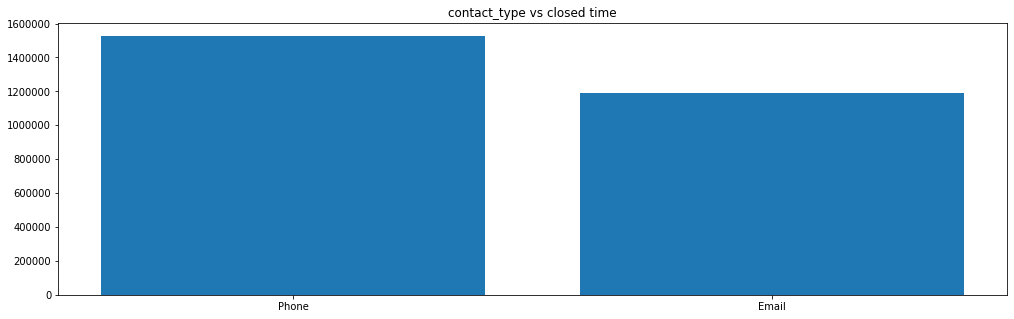

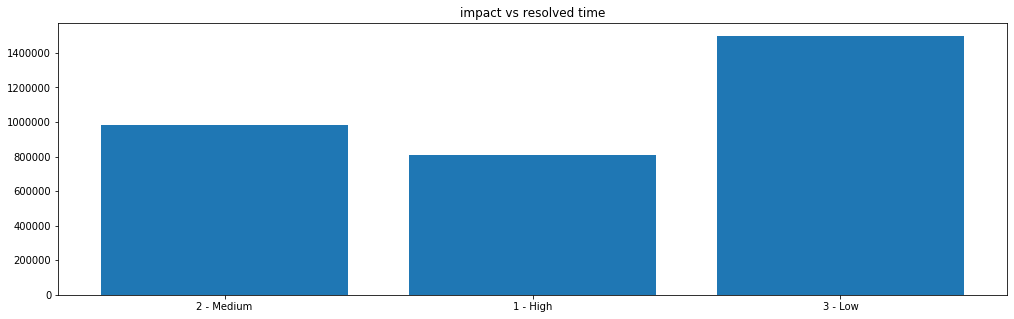

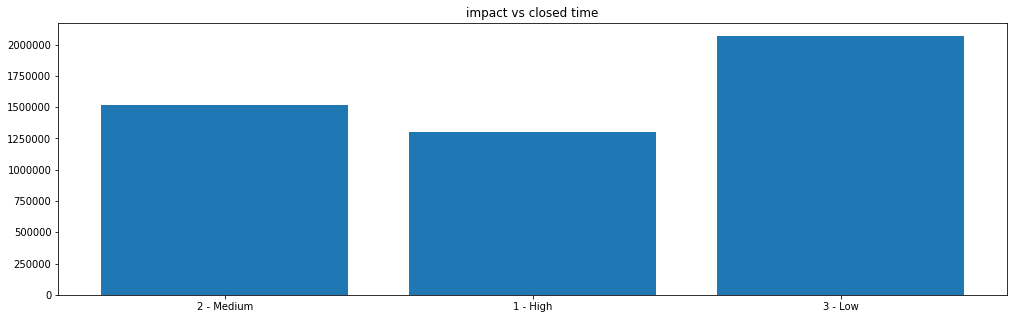

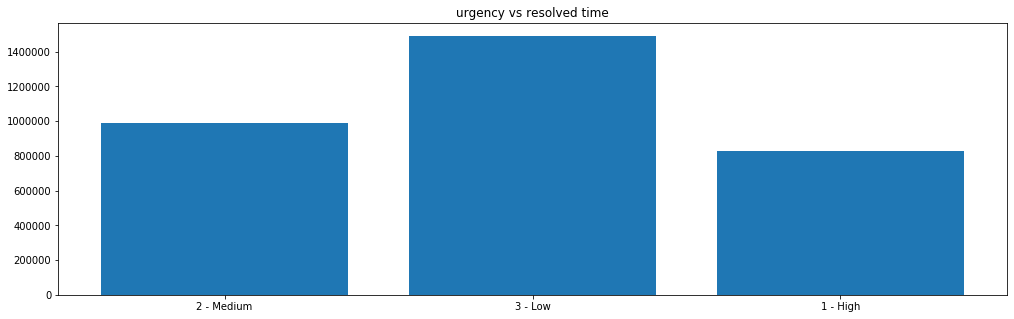

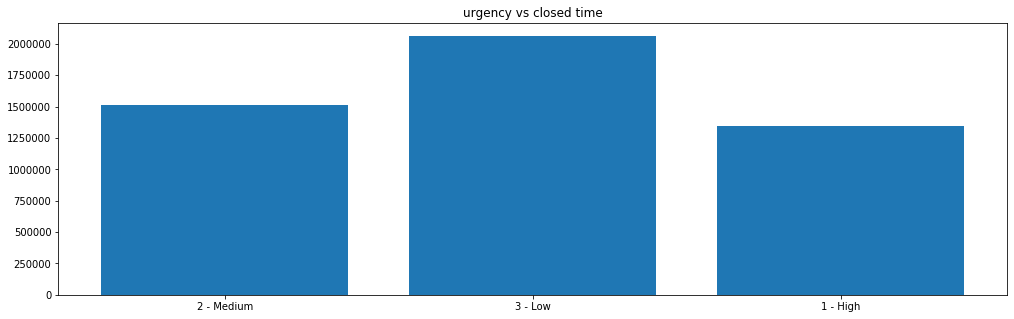

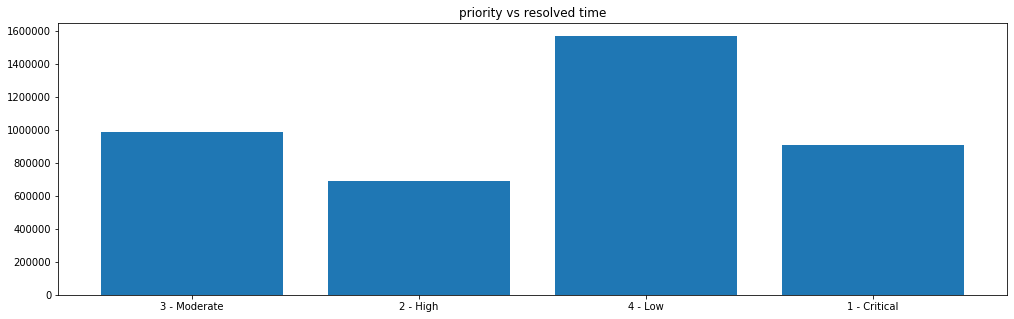

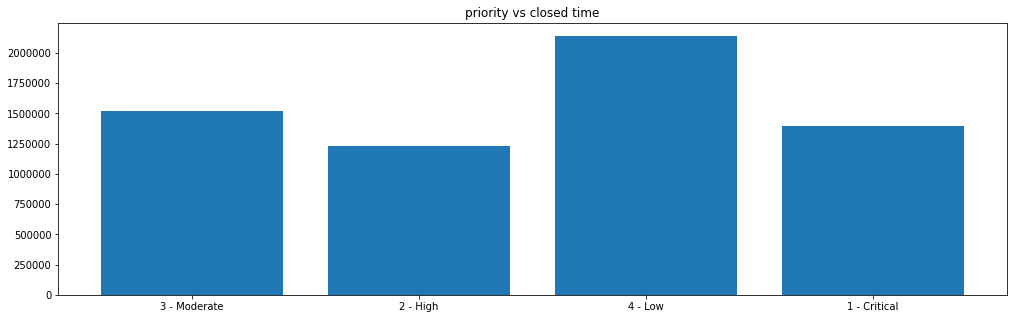

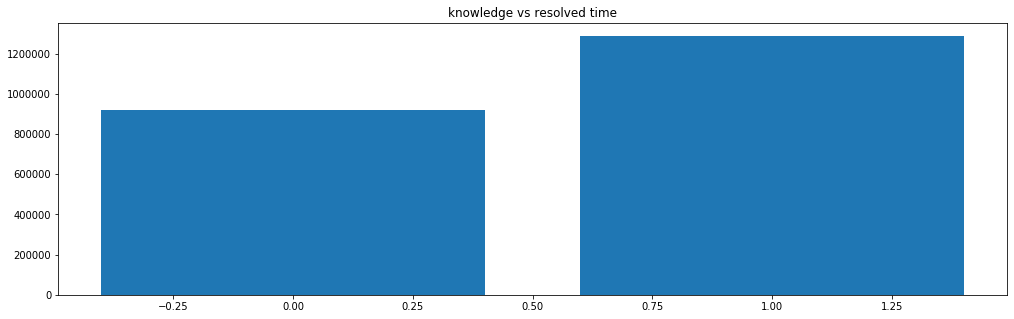

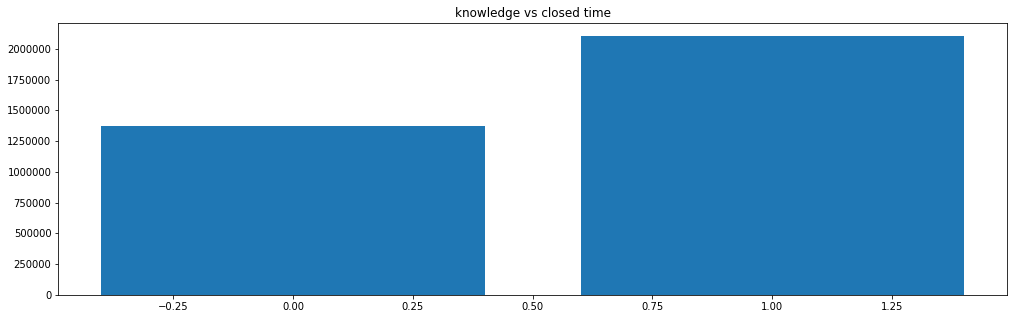

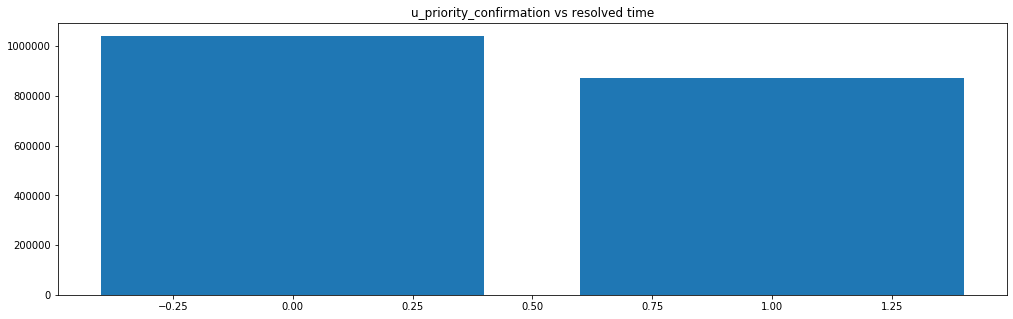

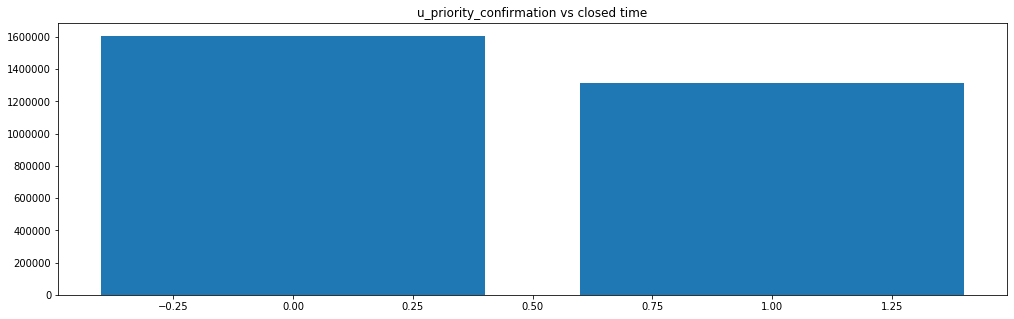

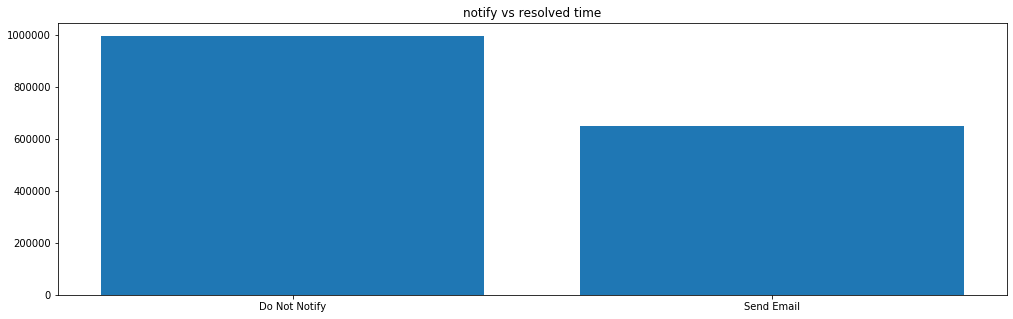

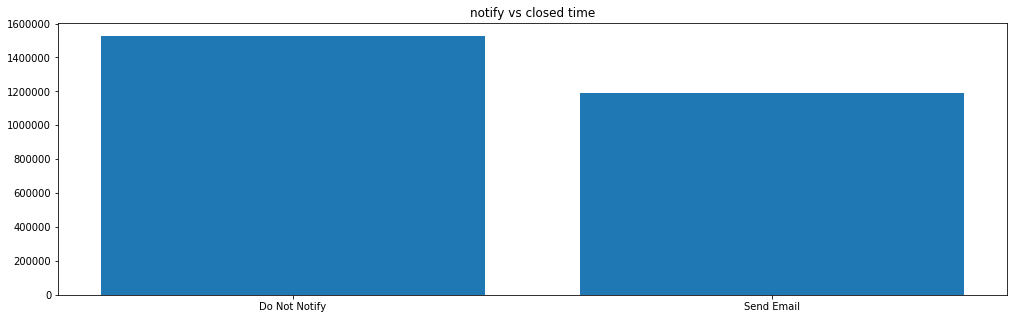

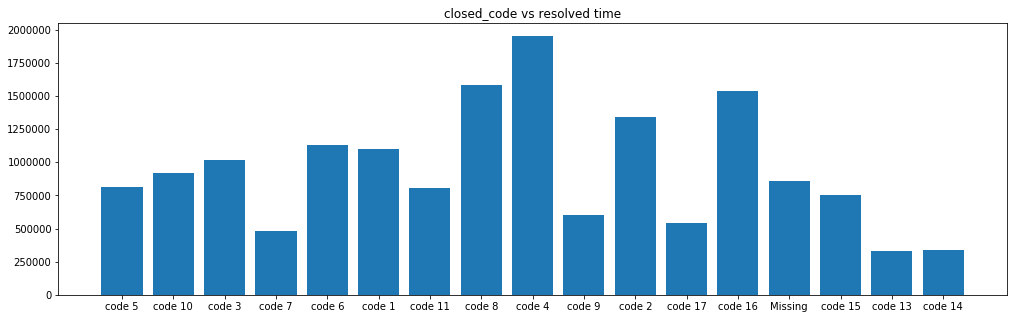

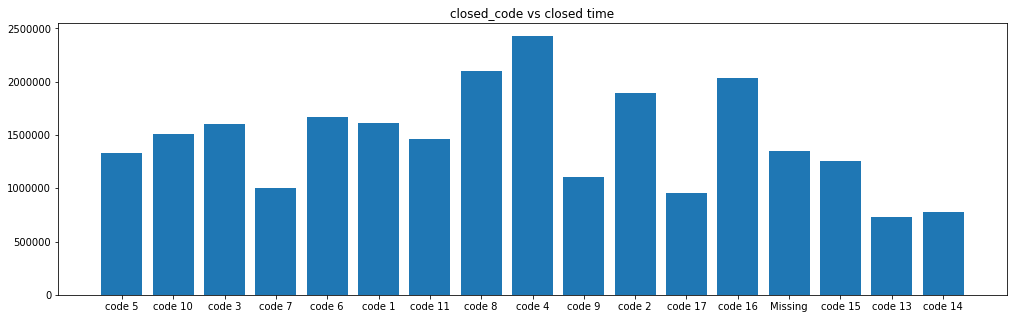

In [410]:
vals=['incident_state', 'reassignment_count', 'reopen_count',
       'sys_mod_count', 'made_sla', 
       'contact_type', 'impact', 'urgency', 'priority',       
       'knowledge', 'u_priority_confirmation', 'notify', 'closed_code',
       ]
for val in vals:
    plot_target(val)

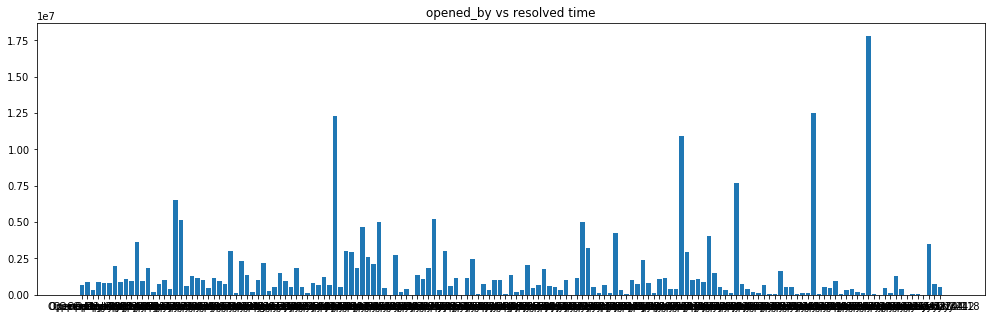

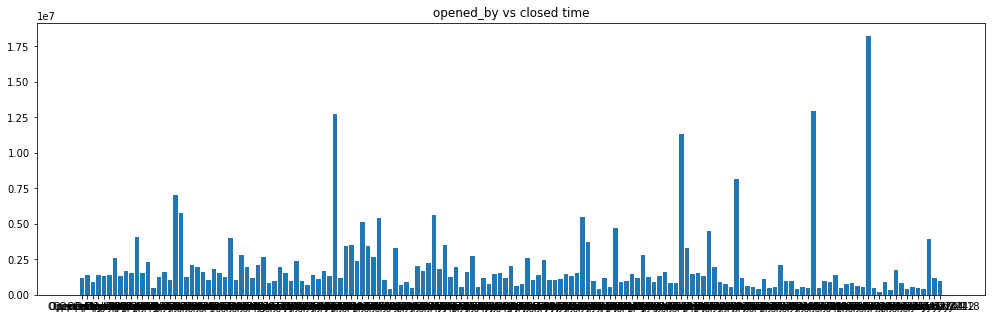

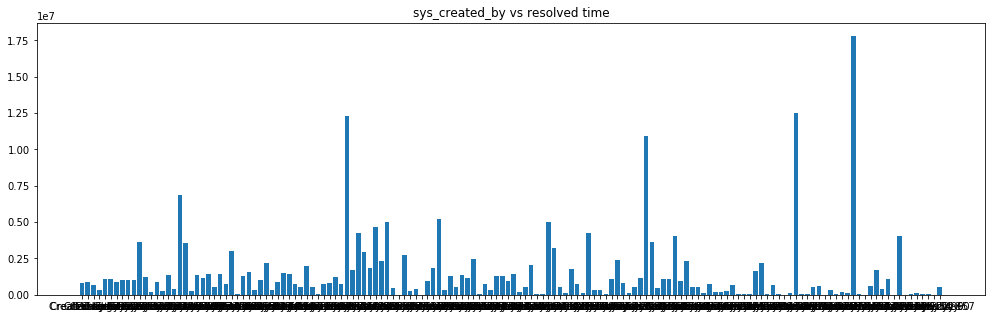

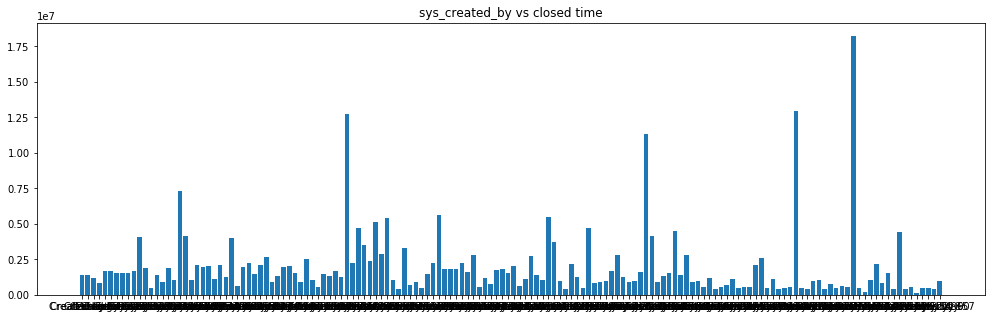

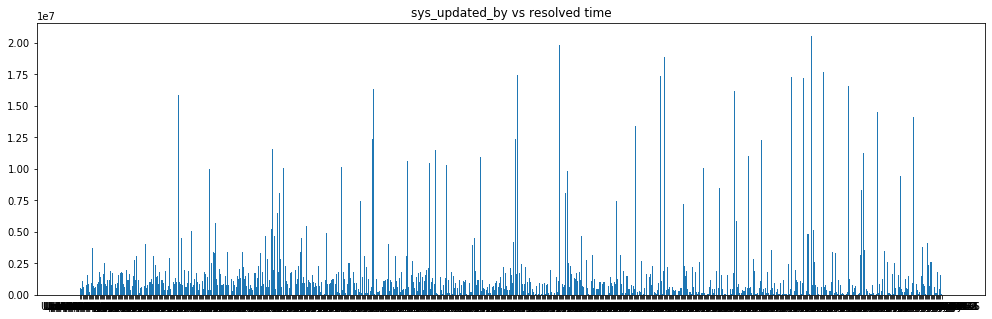

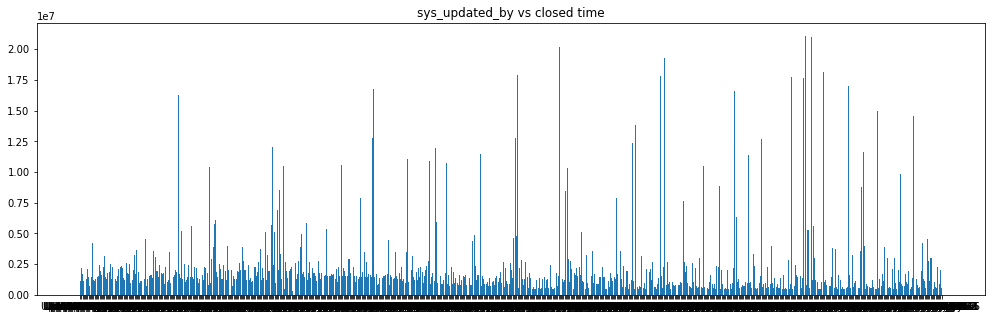

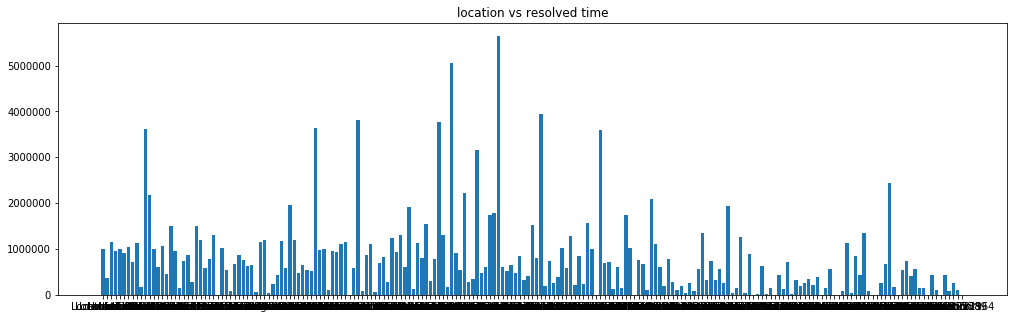

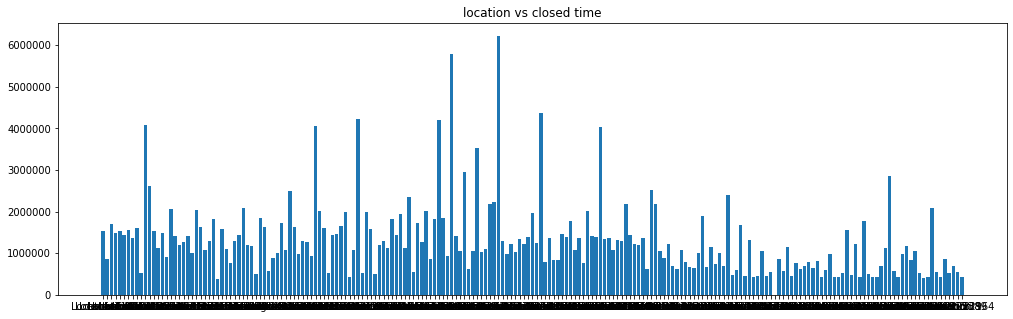

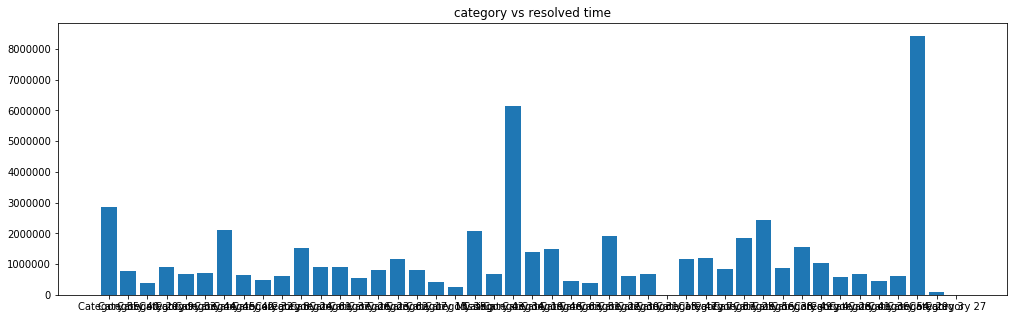

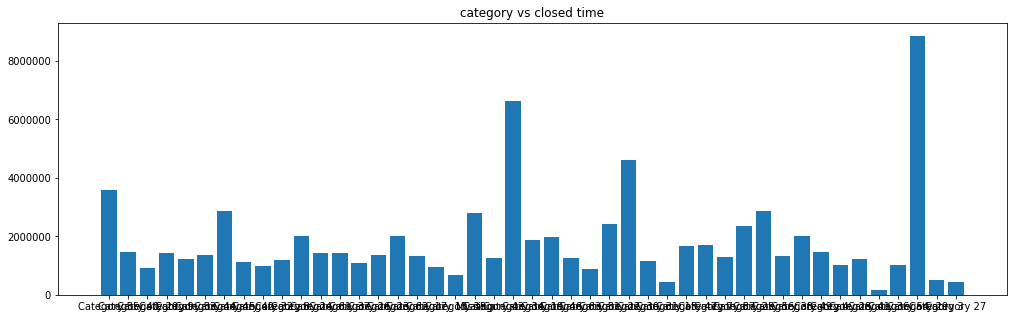

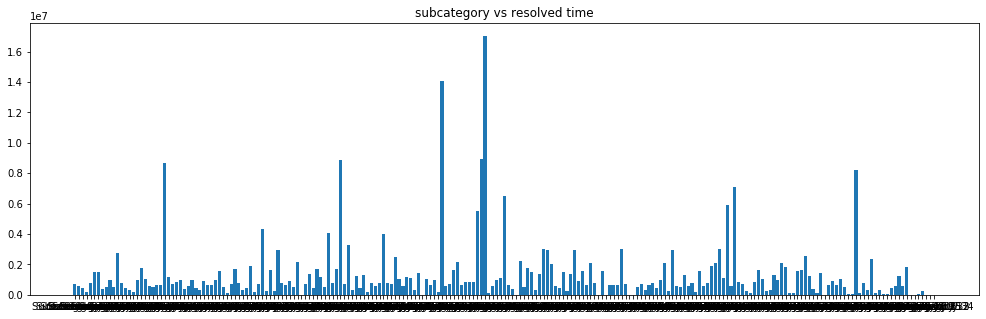

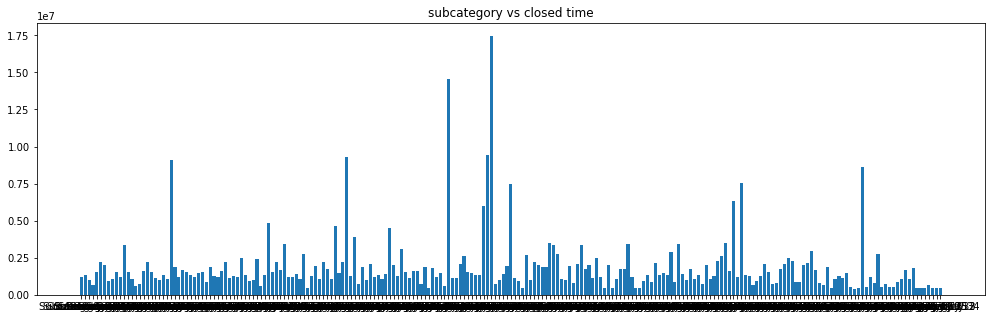

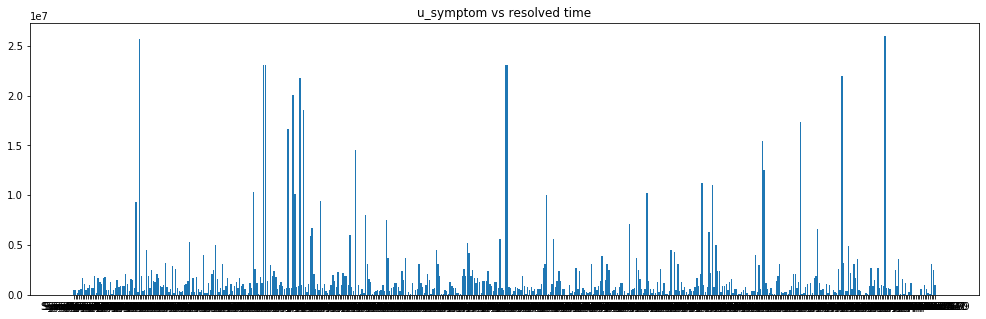

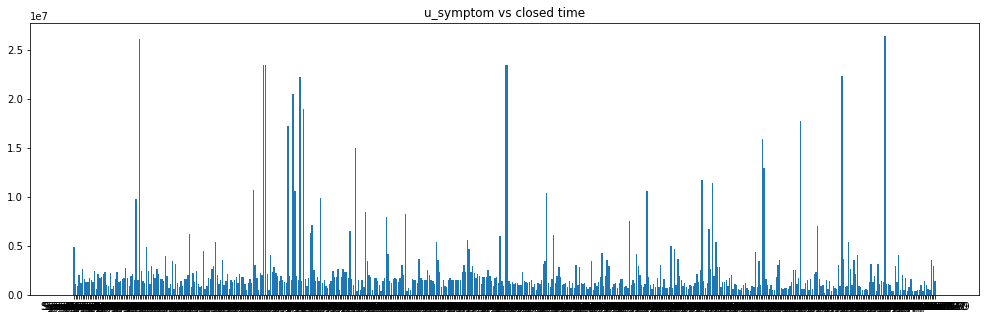

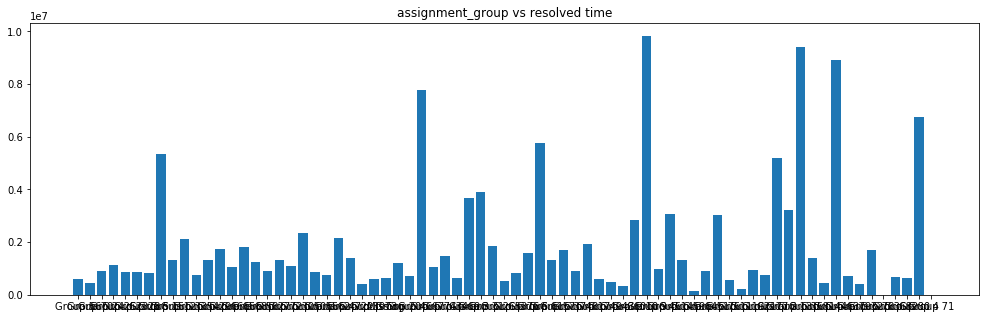

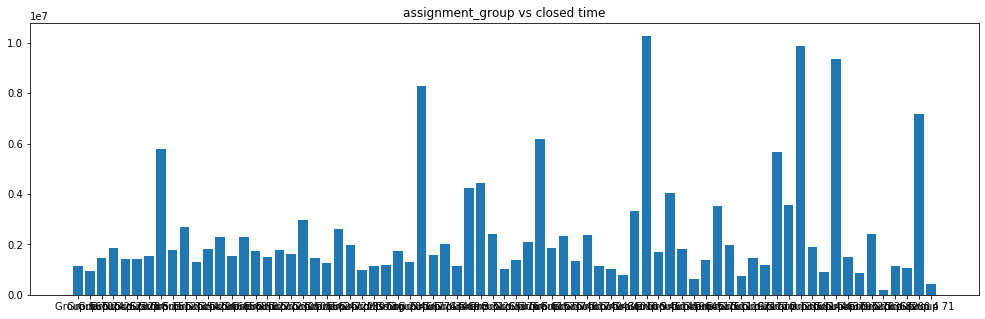

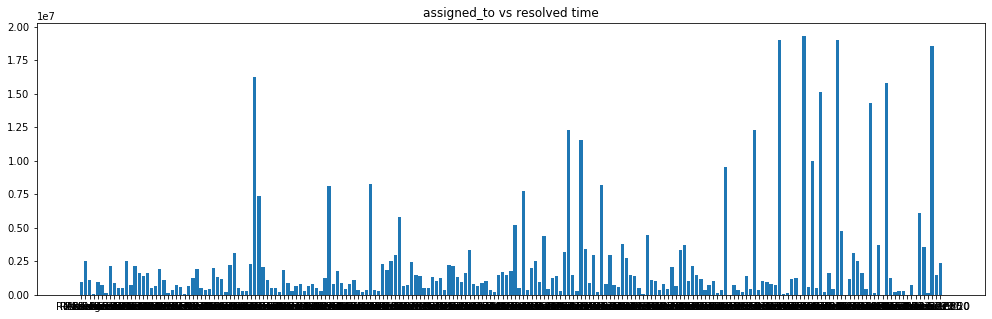

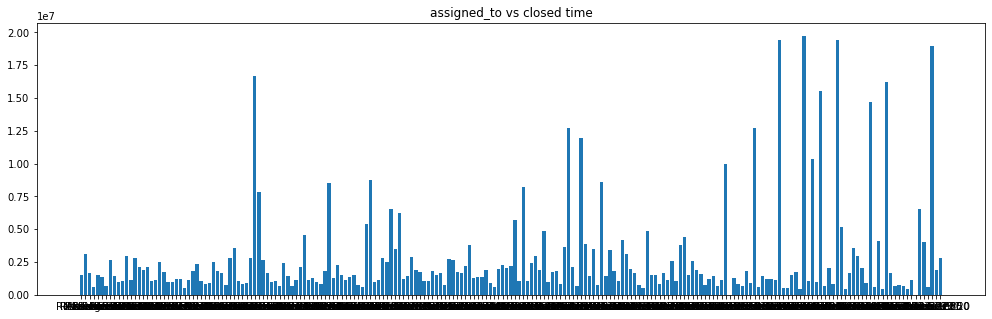

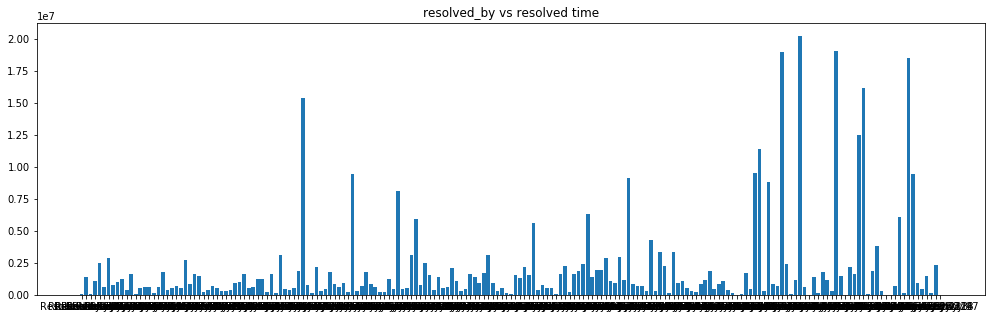

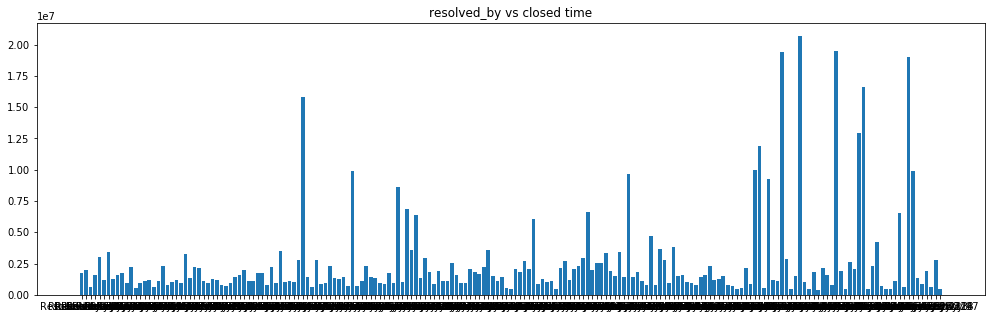

In [437]:
# below features are having many subcategories, so plotting them seperatley
lsts=['opened_by', 'sys_created_by', 'sys_updated_by','location', 'category',
    'subcategory','u_symptom','assignment_group', 'assigned_to','resolved_by']
for val in lsts:
    plot_target(val)

In [456]:
def mean_target(feature):
    ''' Retruns subctegories which take max and min mean time to resolve/close'''
    cats=df1[feature].unique()
    res=[]
    cls=[]
    for val in cats:
        res.append(df1.resolved_time[df1[feature]==val].mean())
        cls.append(df1.closed_time[df1[feature]==val].mean())
    
    # Getting top 5 time and least 5 time taking categories
    res1=np.asarray(res)
    indices_=np.argsort(res1)
    indices=indices_[-5:]
    maxs=[cats[i] for i in indices]
    maxs=' ,'.join(maxs)
    print(feature,' more resolve cats: ',maxs)
    
    indices=indices_[:5]
    mins=[cats[i] for i in indices]
    mins=' ,'.join(mins)
    print(feature,' min resolve cats: ',mins)    
    
    print()
    
    cls1=np.asarray(cls)
    indices_=np.argsort(cls1)
    indices=indices_[-5:]
    maxs=[cats[i] for i in indices]
    maxs=' ,'.join(maxs)
    print(feature,' max close cats: ',maxs)

    indices=indices_[:5]
    mins=[cats[i] for i in indices]
    mins=' ,'.join(mins)
    print(feature,' min close cats ',mins)  
    
    print('*'*100)

In [458]:
# As plots are clutered for high cardinal features, we are not able to see features which are taking more time, so getting their names
lsts=['opened_by', 'sys_created_by', 'sys_updated_by','location', 'category',
    'subcategory','u_symptom','assignment_group', 'assigned_to','resolved_by','caller_id'
       ]
for val in lsts:
    mean_target(val)

opened_by  more resolve cats:  Opened by  106 ,Opened by  73 ,Opened by  441 ,Opened by  151 ,Opened by  216
opened_by  min resolve cats:  Opened by  5 ,Opened by  528 ,Opened by  144 ,Opened by  420 ,Opened by  368

opened_by  max close cats:  Opened by  106 ,Opened by  73 ,Opened by  441 ,Opened by  151 ,Opened by  216
opened_by  min close cats  Opened by  420 ,Opened by  265 ,Opened by  293 ,Opened by  337 ,Opened by  5
****************************************************************************************************
sys_created_by  more resolve cats:  Created by 140 ,Created by 39 ,Created by 182 ,Created by 68 ,Created by 97
sys_created_by  min resolve cats:  Created by 3 ,Created by 207 ,Created by 60 ,Created by 159 ,Created by 179

sys_created_by  max close cats:  Created by 140 ,Created by 39 ,Created by 182 ,Created by 68 ,Created by 97
sys_created_by  min close cats  Created by 54 ,Created by 179 ,Created by 162 ,Created by 19 ,Created by 85
*******************************

## Analysis based on mean times of target variables
1. Logs which are in Awaiting evidence are taking the most time to close or resolve. logs which are in resolved state take the minimum mean time
2. Time taken to resolve or close a log is increasing as reassignment increases, but it is having some ups and downs
3. As reopen count increases, time to resolve/close a log increases upto 6 but it decreses slightly there after
4. As sys_mod increases time to resolve/close a log increases,has some ups and downs
5. It takes more time if made_sla is false
6. Email contact_type is taking less time than phone
7. If impact is high it is resolved quickly and if it is low it is having higher time
8. If urgency is high it is resolved quickly and if it is low it is having higher time
9. If priority is high it is resolved quickly and if it is low it is having higher time
10. If a knowledge based document is not provided while resolving, it is taking less time
11. If there is no double cheking of priority [u_priority_confirmation] it is taking more time
12. If it is notified by emails, it is taking less time
13. If the resolution of incident is code 4 ,it is taking more time, for code 13 it is taking less time
14. 10-20 percent of sub categorical features are taking more time and rest are taking very less time, observed in all the features
15. Even though resolved_time and closed_time are highly correlated, the sub categories mean time to resolve and close are differing. i.e sub categories which take more or less mean time to resolve time are differing from close time